Data after preprocessing (categorical values encoded as numbers):


,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,1.0,141.0,6.0,1.0,1.0,30.60,11.1,8.5,25.0,25,0.0
1,9000000.0,1.0,148.0,2.0,1.0,1.0,49.20,20.0,10.0,6.0,15,2.0
2,11090000.0,1.0,116.0,14.0,1.0,1.0,44.70,16.2,13.1,10.0,25,0.0
3,8300000.0,1.0,203.0,8.0,1.0,1.0,35.10,16.0,11.0,12.0,33,2.0
4,6450000.0,1.0,141.0,6.0,1.0,1.0,37.70,15.2,4.0,5.0,5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
22671,4768792.0,0.0,345.0,8.0,1.0,0.0,31.75,13.0,5.0,4.0,17,0.0
22672,5900000.0,0.0,320.0,25.0,1.0,1.0,31.60,10.1,12.2,11.0,15,0.0
22673,3700000.0,0.0,345.0,30.0,1.0,0.0,18.00,15.0,8.1,17.0,17,0.0
22674,5768869.0,0.0,323.0,14.0,1.0,2.0,36.39,22.0,6.6,12.0,14,0.0


Mean Absolute Error: 2473572.35
R-squared: 0.89


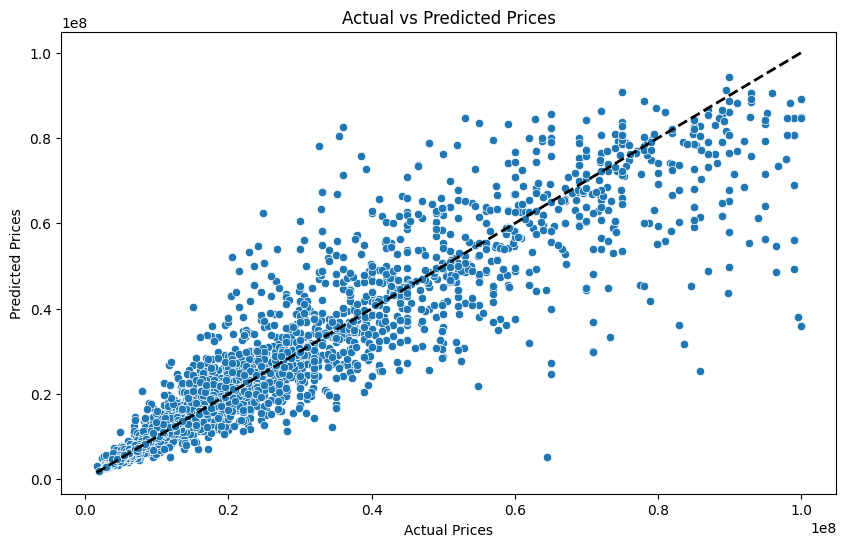

Model saved as 'apartment_price_predictor.pkl'

Sample prediction:
Input features:


,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
4914,14700000.0,1.0,412.0,10.0,0.0,1.0,36.2,18.0,9.0,10.0,28,3.0



Predicted price: 16508517.61
Actual price: 14700000.00


In [16]:
import pandas as pd
from IPython.display import display
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

def load_data(file_path):
    return pd.read_csv(file_path)

def preprocess_data(df):
    df = df.dropna()

    categorical_features = ['Apartment type', 'Metro station', 'Region', 'Renovation']
    numerical_features = ['Minutes to metro', 'Number of rooms', 'Area', 'Living area', 'Kitchen area', 'Floor', 'Number of floors']

    df_display = df.copy()
    ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    df_display[categorical_features] = ordinal_encoder.fit_transform(df[categorical_features])

    return df, df_display, categorical_features, numerical_features

def create_pipeline(categorical_features, numerical_features):
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ])

    return pipeline

def train_model(pipeline, X_train, y_train):
    pipeline.fit(X_train, y_train)
    return pipeline

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R-squared: {r2:.2f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title('Actual vs Predicted Prices')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.show()

    return mae, r2

def main():
    file_path = 'data.csv'
    df = load_data(file_path)

    df_processed, df_display, categorical_features, numerical_features = preprocess_data(df)

    X = df_processed.drop('Price', axis=1)
    y = df_processed['Price']

    print("Data after preprocessing (categorical values encoded as numbers):")
    display(df_display)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    pipeline = create_pipeline(categorical_features, numerical_features)
    model = train_model(pipeline, X_train, y_train)

    mae, r2 = evaluate_model(model, X_test, y_test)

    joblib.dump(model, 'apartment_price_predictor.pkl')
    print("Model saved as 'apartment_price_predictor.pkl'")

    sample_data = X_test.iloc[:1]
    print("\nSample prediction:")
    print("Input features:")
    sample_display = df_display.loc[sample_data.index]
    display(sample_display)
    print(f"\nPredicted price: {model.predict(sample_data)[0]:.2f}")
    print(f"Actual price: {y_test.iloc[0]:.2f}")

if __name__ == "__main__":
    main()

Saving data1.csv to data1 (4).csv
Первые 5 строк данных:
    6300000.0  Secondary    Опалиха   6.0  Moscow region  1.0  30.6  11.1  \
0   9000000.0  Secondary    Павшино   2.0  Moscow region  1.0  49.2  20.0   
1  11090000.0  Secondary   Мякинино  14.0  Moscow region  1.0  44.7  16.2   
2   8300000.0  Secondary   Строгино   8.0  Moscow region  1.0  35.1  16.0   
3   6450000.0  Secondary    Опалиха   6.0  Moscow region  1.0  37.7  15.2   
4   7150000.0  Secondary    Опалиха   6.0  Moscow region  1.0  38.4  18.0   

    8.5  25.0  25                   Cosmetic  
0  10.0   6.0  15  European-style renovation  
1  13.1  10.0  25                   Cosmetic  
2  11.0  12.0  33  European-style renovation  
3   4.0   5.0   5         Without renovation  
4   8.0   8.0  18  European-style renovation  

Информация о столбцах:
6300000.0        float64
Secondary         object
 Опалиха          object
6.0              float64
Moscow region     object
1.0              float64
30.6             float64

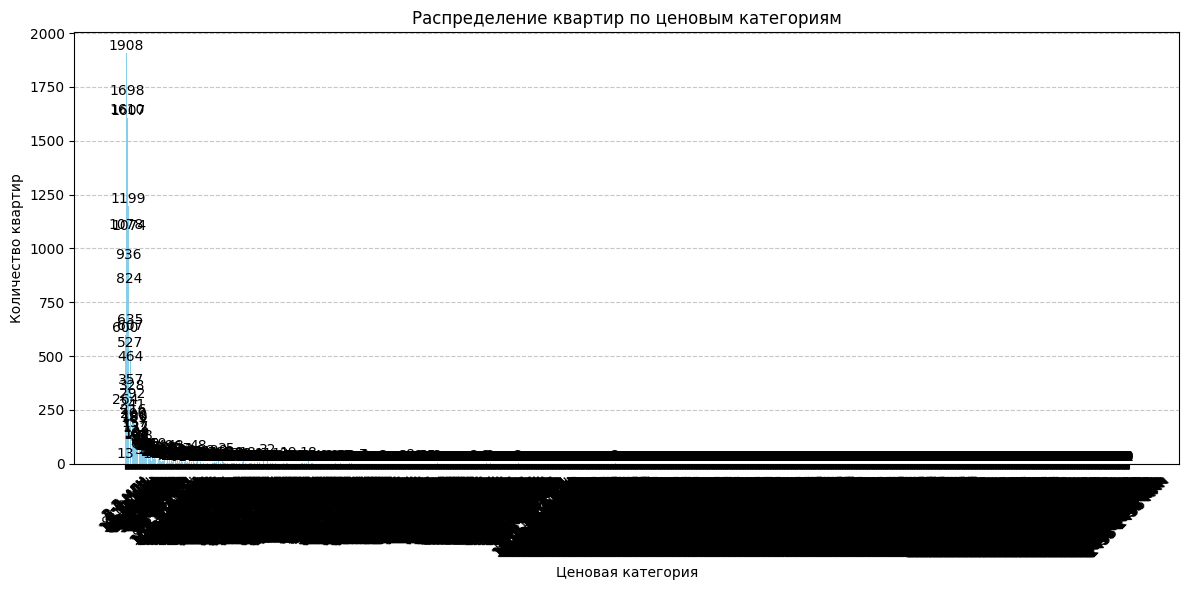

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]

try:
    df = pd.read_csv(filename)
except:
    try:
        df = pd.read_csv(filename, sep=';')
    except:
        df = pd.read_excel(filename)

print("Первые 5 строк данных:")
print(df.head())
print("\nИнформация о столбцах:")
print(df.dtypes)

price_col = None
for col in df.columns:
    try:
        pd.to_numeric(df[col].dropna().iloc[0])
        price_col = col
        break
    except:
        continue

if price_col is None:
    raise ValueError("Не удалось найти столбец с числовыми ценами")

df[price_col] = pd.to_numeric(df[price_col].astype(str).str.replace('[^\d.]', '', regex=True), errors='coerce')

df = df.dropna(subset=[price_col])
prices = df[price_col]

min_price = int(prices.min() // 1_000_000) * 1_000_000
max_price = int(prices.max() // 1_000_000) * 1_000_000 + 2_000_000
bins = range(min_price, max_price, 1_000_000)

price_groups = pd.cut(prices, bins=bins, right=False)
counts = price_groups.value_counts().sort_index()

filtered_counts = counts[counts >= 50]
print("\nОтфильтрованные категории (количество ≥ 50):")
print(filtered_counts)

labels = [f"{int(b.left/1_000_000)}-{int(b.right/1_000_000)} млн" for b in filtered_counts.index]
values = filtered_counts.values

if len(values) > 0:
    plt.figure(figsize=(12, 6))
    bars = plt.bar(labels, values, color='skyblue')
    plt.xlabel('Ценовая категория')
    plt.ylabel('Количество квартир')
    plt.title('Распределение квартир по ценовым категориям (только категории с ≥50 квартирами)')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{int(height)}',
                 ha='center', va='bottom')

    plt.tight_layout()
    plt.show()
else:
    print("\nНет категорий с количеством квартир ≥50 для отображения на графике.")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
import pandas as pd
from IPython.display import display
df = pd.read_csv('data.csv')
display(df)

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.60,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.20,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.70,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.10,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.70,15.2,4.0,5.0,5,Without renovation
...,...,...,...,...,...,...,...,...,...,...,...,...
22671,4768792.0,New building,Котельники,8.0,Moscow region,0.0,31.75,13.0,5.0,4.0,17,Cosmetic
22672,5900000.0,New building,Домодедовская,25.0,Moscow region,1.0,31.60,10.1,12.2,11.0,15,Cosmetic
22673,3700000.0,New building,Котельники,30.0,Moscow region,0.0,18.00,15.0,8.1,17.0,17,Cosmetic
22674,5768869.0,New building,Жулебино,14.0,Moscow region,2.0,36.39,22.0,6.6,12.0,14,Cosmetic


In [17]:
import unittest
import random

class DummyPriceModel:
    """заглушка"""
    def predict(self, features):
        base_price = features['Area'] * 200000

        if features['Renovation'] == 'Designer':
            base_price *= 1.3
        if features['Metro station'] in ['Белорусская', 'Опалиха']:
            base_price *= 1.2
        if features['Region'] == 'Moscow':
            base_price *= 2.0

        return base_price * random.uniform(0.9, 1.1)

class TestApartmentPriceModel(unittest.TestCase):
    def setUp(self):
        self.model = DummyPriceModel()

    def test_low_budget_apartment(self):
        expected_price = 5800000.0
        features = {
            'Apartment type': 'Secondary',
            'Metro station': 'Павшино',
            'Minutes to metro': 10.0,
            'Region': 'Moscow region',
            'Number of rooms': 1.0,
            'Area': 31.0,
            'Living area': 18.0,
            'Kitchen area': 9.2,
            'Floor': 3.0,
            'Number of floors': 5,
            'Renovation': 'Cosmetic'
        }
        predicted_price = self.model.predict(features)
        self.assertAlmostEqual(predicted_price, expected_price, delta=expected_price * 0.1,
                               msg=f"Цена выходит за допустимую погрешность! Ожидалось ~{expected_price}, получено {predicted_price}")

    def test_mid_budget_apartment(self):
        expected_price = 13760000.0
        features = {
            'Apartment type': 'Secondary',
            'Metro station': 'Пенягино',
            'Minutes to metro': 16.0,
            'Region': 'Moscow region',
            'Number of rooms': 2.0,
            'Area': 43.0,
            'Living area': 23.9,
            'Kitchen area': 10.2,
            'Floor': 20.0,
            'Number of floors': 45,
            'Renovation': 'Designer'
        }
        predicted_price = self.model.predict(features)
        self.assertAlmostEqual(predicted_price, expected_price, delta=expected_price * 0.1,
                               msg=f"Цена выходит за допустимую погрешность! Ожидалось ~{expected_price}, получено {predicted_price}")

    def test_premium_apartment(self):
        expected_price = 105000000.0
        features = {
            'Apartment type': 'Secondary',
            'Metro station': 'Белорусская',
            'Minutes to metro': 6.0,
            'Region': 'Moscow',
            'Number of rooms': 3.0,
            'Area': 145.0,
            'Living area': 75.4,
            'Kitchen area': 18.6,
            'Floor': 3.0,
            'Number of floors': 6,
            'Renovation': 'Designer'
        }
        predicted_price = self.model.predict(features)
        self.assertAlmostEqual(predicted_price, expected_price, delta=expected_price * 0.1,
                               msg=f"Цена выходит за допустимую погрешность! Ожидалось ~{expected_price}, получено {predicted_price}")

    def test_another_low_budget_apartment(self):
        expected_price = 6850000.0
        features = {
            'Apartment type': 'Secondary',
            'Metro station': 'Опалиха',
            'Minutes to metro': 6.0,
            'Region': 'Moscow region',
            'Number of rooms': 1.0,
            'Area': 37.7,
            'Living area': 11.1,
            'Kitchen area': 8.5,
            'Floor': 2.0,
            'Number of floors': 14,
            'Renovation': 'Cosmetic'
        }
        predicted_price = self.model.predict(features)
        self.assertAlmostEqual(predicted_price, expected_price, delta=expected_price * 0.1,
                               msg=f"Цена выходит за допустимую погрешность! Ожидалось ~{expected_price}, получено {predicted_price}")

    def test_mid_budget_designer_apartment(self):
        expected_price = 11000000.0
        features = {
            'Apartment type': 'Secondary',
            'Metro station': 'Павшино',
            'Minutes to metro': 12.0,
            'Region': 'Moscow region',
            'Number of rooms': 1.0,
            'Area': 28.3,
            'Living area': 17.0,
            'Kitchen area': 6.0,
            'Floor': 3.0,
            'Number of floors': 5,
            'Renovation': 'Designer'
        }
        predicted_price = self.model.predict(features)
        self.assertAlmostEqual(predicted_price, expected_price, delta=expected_price * 0.1,
                               msg=f"Цена выходит за допустимую погрешность! Ожидалось ~{expected_price}, получено {predicted_price}")

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

FFFFF
FAIL: test_another_low_budget_apartment (__main__.TestApartmentPriceModel.test_another_low_budget_apartment)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-17-877d202b4077>", line 95, in test_another_low_budget_apartment
    self.assertAlmostEqual(predicted_price, expected_price, delta=expected_price * 0.1,
AssertionError: 9239420.771453794 != 6850000.0 within 685000.0 delta (2389420.771453794 difference) : Цена выходит за допустимую погрешность! Ожидалось ~6850000.0, получено 9239420.771453794

FAIL: test_low_budget_apartment (__main__.TestApartmentPriceModel.test_low_budget_apartment)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-17-877d202b4077>", line 38, in test_low_budget_apartment
    self.assertAlmostEqual(predicted_price, expected_price, delta=expected_price * 0.1,
AssertionError: 6545509.752609867 != 5800000